<font  style="font-size: 3rem; color: darkviolet"> Convolutional Neural Networks in TensorFlow's Keras API </font>

AA - DEL - 2023/24 - TP2 - 3h

Author: Francesca Galassi

*This assignment is inspired by the Deep Learning course on Coursera by Andrew Ng, Stanford University, for which we are thankful.*

**Submit this notebook with your solutions, answers and observations.**

In this practical, you will learn how to build and train a Convolutional Neural Network (CNN) using TensorFlow's Keras Sequential API. The objective is to predict whether an individual's emotional state is positive or negative based on input image data. This task is important because only those who genuinely smile will be allowed into the Happy House.

You can access the documentation for the Sequential API at the following link:
https://www.tensorflow.org/guide/keras/sequential_model

Reminder: 

- *Epoch*: One complete pass through the entire training dataset. During an epoch, the model learns from all training examples exactly once.

- *Batch*: A subset of the training dataset processed in one forward pass and one backward pass. Weights are updated after processing each batch.

- *Iterations*: The process of updating the weights based on the gradients computed from one batch of data. One iteration is completed when a batch of data has been processed.

- *Training Steps*: The total number of steps to complete one epoch, equal to the total number of training examples divided by the batch size.

- *Optimizer*: An algorithm used to minimize the loss function by updating the weights of the neural network during training. Common optimizers include Stochastic Gradient Descent (SGD), Adam, RMSprop, and Adagrad. Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers


## Table of Contents
- [1 - The Happy House Dataset](#1)
- [2 - The Sequential Model](#2)
- [3 - Train and Evaluate the Model](#3)

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

%matplotlib inline
np.random.seed(1)

<a name='1'></a>
## <font color='darkviolet'> 1 - The Happy House dataset

<a name='ex-1'></a>
#### <font color='blue'> Exercise 1
Exploring and describing the dataset is an essential initial step in any deep learning project. Follow the code and steps provided below to explore and describe the Happy House dataset. 
    
(i.) Load the Happy House dataset, which contains images of people's faces labeled with whether they are smiling or not. To accomplish this, complete the implementation of the `load_happy_dataset` function. This function loads both the training and test datasets from HDF5 files and returns them as NumPy arrays. Additionally, it ensures that the input images are normalized by scaling pixel values to the range [0, 1], which can be achieved by dividing the pixel values by the maximum pixel value. Note that the labels are reshaped to have a shape of (m,1), where m represents the number of examples.

In [3]:
def load_happy_dataset():
    """
    Load the Happy House dataset from HDF5 files.

    Returns:
    train_set_x -- numpy array containing features of the training set
    train_set_y -- numpy array containing labels of the training set
    test_set_x  -- numpy array containing features of the test set
    test_set_y  -- numpy array containing labels of the test set
    classes -- numpy array containing the list of classes
    """
    
    # Load the training dataset
    train_dataset = h5py.File('data/train_happy.h5', "r")
    # Retrieve the keys within the HDF5 file
    dataset_keys = list(train_dataset.keys())
    print(dataset_keys[:])
    
    # Extract the features and labels for the training set
    # Normalize pixel values
    # TODO    
    train_set_x = np.array(train_dataset["train_set_x"])
    train_set_y = np.array(train_dataset["train_set_y"])
    train_set_x = train_set_x/train_set_x.max()
    train_set_y = train_set_y/train_set_y.max()
    # Load the test dataset
    test_dataset = h5py.File('data/test_happy.h5', "r")
    # Retrieve the keys within the HDF5 file
    dataset_keys = list(test_dataset.keys())
    print(dataset_keys[:])
    
    # Extract the features and labels for the test set
    # Normalize pixel values
    # TODO
    test_set_x = np.array(test_dataset["test_set_x"])
    test_set_y = np.array(test_dataset["test_set_y"])
    test_set_x = test_set_x/test_set_x.max()
    test_set_y = test_set_y/test_set_y.max()
    # Extract the list of classes
    classes=np.union1d(test_dataset["list_classes"] , train_dataset["list_classes"])

    # Reshape the labels to match the expected shape
    train_set_y = train_set_y.reshape((train_set_y.shape[0],1))
    test_set_y = test_set_y.reshape((test_set_y.shape[0],1))
    
    return train_set_x, train_set_y, test_set_x, test_set_y, classes

In [4]:
# Load the Happy House dataset
X_train, Y_train, X_test, Y_test, classes = load_happy_dataset()

['list_classes', 'train_set_x', 'train_set_y']
['list_classes', 'test_set_x', 'test_set_y']


(ii.) Describe the dataset by providing information about its size, dimensions of the images, labels, and the distribution of labels. Visualize a few images from the dataset along with their corresponding labels.

(600, 64, 64, 3)
{np.float64(0.0), np.float64(1.0)}


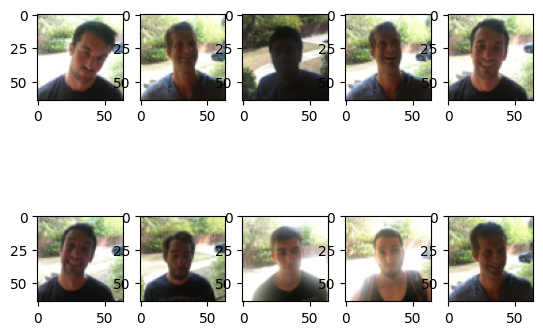

In [5]:
# TODO
print(X_train.shape)

# Examine labels
print(set([x[0] for x in Y_train]))

# Iterate over the dataset to display the first 10 images and labels
# TODO
i=1
for element in X_train:
    plt.subplot(2,5,i)
    plt.imshow(element)
    i+=1
    if (i>10):
        break

<a name='2'></a>
## <font color='darkviolet'> 2 - The Sequential Model
    
The TensorFlow Keras Sequential API is an easy-to-use tool for building and training neural networks within the TensorFlow framework. It is suited for tasks that involve a sequential flow, where each layer takes one input and produces one output.

To instantiate a Sequential model in Keras, a list of layers is provided to the Sequential constructor. These layers define the architecture of the neural network, and their sequence determines how data flows through the network.

<a name='ex-2'></a>
#### <font color='blue'> Exercise 2

(i.) Implement the `happyModel` function to create a CNN model with the following layers and configurations:
    
- ZeroPadding2D: Add padding of 3 pixels to the input shape.
- Conv2D: Utilize 32 filters of size 7x7 with a stride of 1.
- BatchNormalization: Normalize the input along the depth axis (channels or feature maps).
- ReLU: Apply Rectified Linear Unit activation.
- MaxPool2D: Perform max pooling using default parameters.
- Flatten: Flatten the output of the previous layer.
- Fully-connected (Dense) layer: Add a fully connected layer with 1 unit and apply a sigmoid activation.

Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers
    
Note: In Batch Normalization, input values are normalized using their mean and variance over a mini-batch, ensuring a mean of zero and standard deviation of one to stabilize learning. Next, learnable parameters, gamma and beta, adjust normalized values, aiding in capturing complex patterns and accelerating learning. During testing, estimated statistics from training are used to maintain consistency between training and inference phases.

In [6]:
def happyModel(input_shape=(64, 64, 3)):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the model architecture
    # TODO

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.ZeroPadding2D(padding=3),
        tf.keras.layers.Conv2D(32,(7,7),strides=1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ])

    return model

In [7]:
# For testing the implementation
from termcolor import colored

def comparator(learner, instructor):
    for a, b in zip(learner, instructor):
        if a != b:
            print(colored("Test failed", attrs=['bold']),
                  "\n Expected value \n\n", colored(f"{b}", "green"), 
                  "\n\n does not match the input value: \n\n", 
                  colored(f"{a}", "red"))
            raise AssertionError("Error in test") 
    print(colored("All tests passed!", "green"))

def summary(model):
    result = []
    for layer in model.layers:
        descriptors = [layer.__class__.__name__, layer.output.shape, layer.count_params()]
        if isinstance(layer, tf.keras.layers.Conv2D):
            descriptors.extend([layer.padding, layer.activation.__name__, layer.kernel_initializer.__class__.__name__])
        elif isinstance(layer, tf.keras.layers.MaxPooling2D):
            descriptors.extend([layer.pool_size, layer.strides, layer.padding])
        elif isinstance(layer, tf.keras.layers.Dropout):
            descriptors.append(layer.rate)
        elif isinstance(layer, tf.keras.layers.ZeroPadding2D):
            descriptors.append(layer.padding)
        elif isinstance(layer, tf.keras.layers.Dense):
            descriptors.append(layer.activation.__name__)
        result.append(descriptors)
    return result


happy_model = happyModel()

# Get the summary of the model
model_summary = summary(happy_model)

# The expected layer configurations
output = [
    ['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
    ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
    ['BatchNormalization', (None, 64, 64, 32), 128],
    ['ReLU', (None, 64, 64, 32), 0],
    ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
    ['Flatten', (None, 32768), 0],
    ['Dense', (None, 1), 32769, 'sigmoid']
]

# Compare the two inputs
comparator(model_summary, output)

All tests passed!


(ii.) After constructing a model, the next step is to compile it for training. This involves specifying settings such as the optimizer, loss function, and performance metrics.

To compile the model, utilize the `.compile()` method and set the following configurations:

- Optimizer: Use the Adam optimizer with an initial learning rate of 0.0001. Note: Adam optimizer dynamically adjusts the learning rate for each parameter during training based on their past gradients and second moments.

- Loss Function: Specify `binary_crossentropy` as the loss function since the task involves binary classification, determining if someone is smiling or not.

- Metrics: Track the `accuracy` metric throughout the training process to assess the model's performance.

For further information on various optimizers, refer to the TensorFlow documentation: 
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [8]:
# TODO

happy_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.losses.binary_crossentropy,metrics=["accuracy"])

(iii.) Invoke the `.summary()` method on `happy_model` to display a summary of the model architecture and its parameters. Answer the following questions:

**Q1** What is the distinction between trainable and non-trainable parameters?
    
    des paramètres qui ne font pas partie de l'apprentissage

**Q2** For each layer in the model architecture, outline the steps to calculate the total number of trainable parameters. Additionally, identify the source of the 64 non-trainable parameters.
    
Conv2D :
- (7×7×3+1)×32=4736
- (7x7 filtre, 3 canaux d’entrée, 1 biais par filtre)

BatchNormalization :

2 paramètres entraînables (gamma, beta) +
2 non entraînables (mean, variance) par canal

=> 2×32=642×32=64 non entraînables et 2×32=642×32=64 entraînables

Dense :
- 32768×1+1=32769


**Q3** In the output dimensions of a layer, the first dimension is labeled as `None`. Can you explain what this signifies?
    
    Placeholder for the batch size, here it says that it is dynamic.

In [9]:
# TODO 

happy_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 70, 70, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

<a name='3'></a>
## <font color='darkviolet'> 3 - Training and Evaluating the Model
    
<a name='ex-3'></a>
#### <font color='blue'> Exercise 3

(i.) After creating and compiling the model, the next step is to train it on the labeled dataset. This is done by calling the `.fit()` method, which automates various aspects of training, including backpropagation. When calling `.fit()`, you'll need to specify several parameters to configure the training process:     
- *Number of Epochs*: how many times the model will iterate over the entire dataset during training. Each iteration comprises a forward pass (predicting outputs) and a backward pass (updating model parameters based on computed errors).
- *Batch Size*: the number of samples processed before the model's parameters are updated. 
- *Validation Split*: the portion of training data for validation. During training, the model's performance on this validation subset is monitored to evaluate its generalization ability.

To automatically save the best model during training, you can use the `ModelCheckpoint` callback with `.fit()`. You can find more details in the documentation https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback. Additionally, to prevent overfitting, you can combine `EarlyStopping` with `ModelCheckpoint`. `EarlyStopping` monitors a specific metric and stops training when this metric no longer improves for a certain number of epochs. By combining it with `ModelCheckpoint`, you can save the best model while avoiding overfitting.
    
Your task is to implement the use of `ModelCheckpoint` and `EarlyStopping` callbacks during model training. While your model is learning, keep track of the loss and accuracy metrics for both the training and validation datasets. Monitor the progress of each epoch. 
    
Note: The `.fit()` method returns a History object, containing information about the training process.

In [10]:
# TODO

history = happy_model.fit(X_train,Y_train,epochs=20,batch_size=32,validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),tf.keras.callbacks.ModelCheckpoint("./checkpoint.keras")])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5694 - loss: 0.7903 - val_accuracy: 0.7250 - val_loss: 0.6740
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7415 - loss: 0.5181 - val_accuracy: 0.6917 - val_loss: 0.6463
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8103 - loss: 0.4127 - val_accuracy: 0.7500 - val_loss: 0.6262
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8753 - loss: 0.3316 - val_accuracy: 0.7583 - val_loss: 0.6044
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8955 - loss: 0.2934 - val_accuracy: 0.8333 - val_loss: 0.5840
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9090 - loss: 0.2526 - val_accuracy: 0.8833 - val_loss: 0.5633
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9514 - loss: 0.2258 - val_accuracy: 0.8917 - val_loss: 0.5423
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9556 - loss: 0.1896 - val_accuracy: 0.9667 - v

(ii.) Observe the training process, including the changes in loss and accuracy over each epoch, for the training and validation test dataset. 

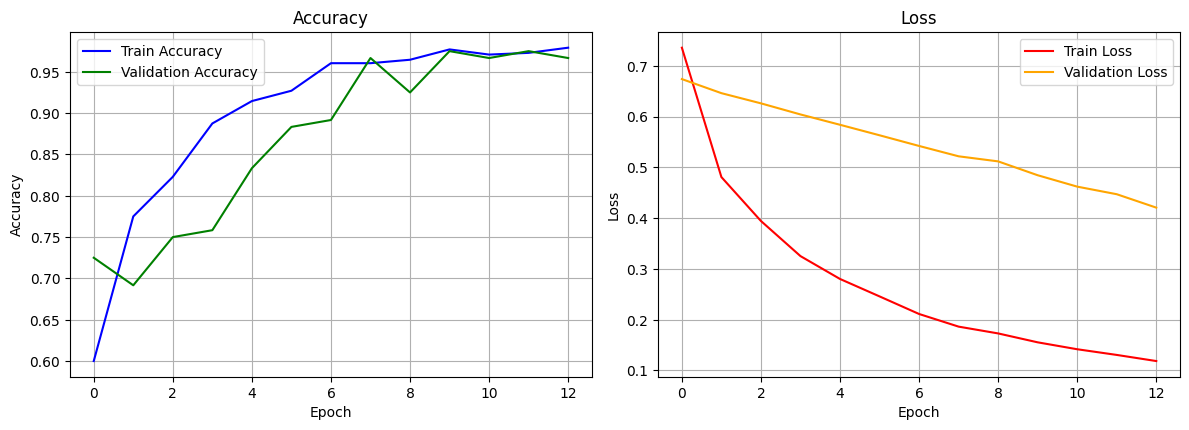

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

(iii.) After training the model, evaluate its performance on unseen data to understand how well it generalizes beyond the training set. By using the `.evaluate()` method, you can quantify how effectively your model performs on new, previously unseen data from the test set. Describe your results. Modify the architecture and or the hyperparameters and observe the change in performances

In [12]:
# TODO

happy_model.evaluate(X_test,Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8955 - loss: 0.4521


[0.44734543561935425, 0.9066666960716248]

 (iv.) Bonus: Explore how changes in architecture or hyperparameters affect your model's performance. Experiment with changes such as adding/removing layers or altering their configurations. Retrain the model and evaluate its performance.

In [13]:
#TODO